Name : Karsh Mistry

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("sales_dataset_2024.csv")

# Show the first few rows
df.head()


,Date,Region,Product,Category,Quantity,Unit Price,Sales,Profit
0,2024-01-01,North,Monitor,Accessories,8,918.05,7344.44,653.69
1,2024-01-01,South,Tablet,Electronics,7,134.22,939.55,250.43
2,2024-01-01,East,Monitor,Accessories,8,1076.71,8613.64,475.01
3,2024-01-01,West,Smartphone,Electronics,8,1257.04,10056.33,1036.66
4,2024-01-02,North,Monitor,Accessories,5,945.35,4726.74,959.12


In [2]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Add 'Month' and 'Quarter' for trend analysis
df['Month'] = df['Date'].dt.to_period('M').astype(str)
df['Quarter'] = df['Date'].dt.to_period('Q').astype(str)

df.head()


,Date,Region,Product,Category,Quantity,Unit Price,Sales,Profit,Month,Quarter
0,2024-01-01,North,Monitor,Accessories,8,918.05,7344.44,653.69,2024-01,2024Q1
1,2024-01-01,South,Tablet,Electronics,7,134.22,939.55,250.43,2024-01,2024Q1
2,2024-01-01,East,Monitor,Accessories,8,1076.71,8613.64,475.01,2024-01,2024Q1
3,2024-01-01,West,Smartphone,Electronics,8,1257.04,10056.33,1036.66,2024-01,2024Q1
4,2024-01-02,North,Monitor,Accessories,5,945.35,4726.74,959.12,2024-01,2024Q1


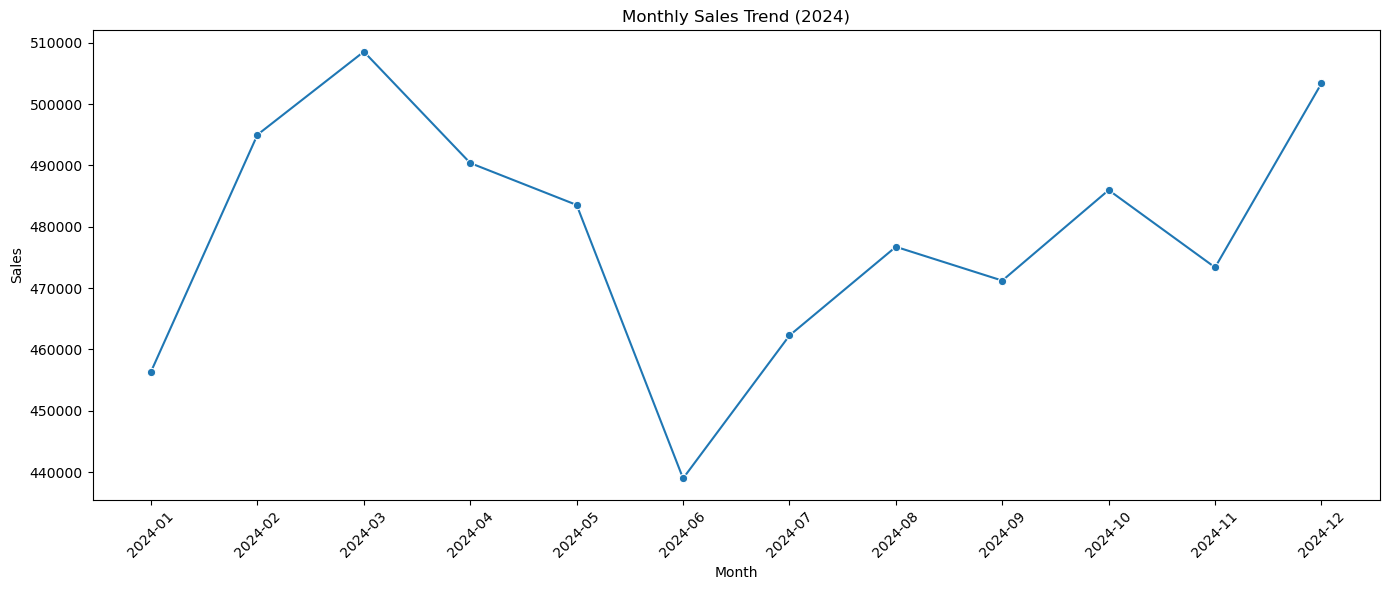

In [3]:
# Group by Month
monthly_sales = df.groupby('Month')[['Sales', 'Profit']].sum().reset_index()

# Plot Monthly Sales
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend (2024)')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


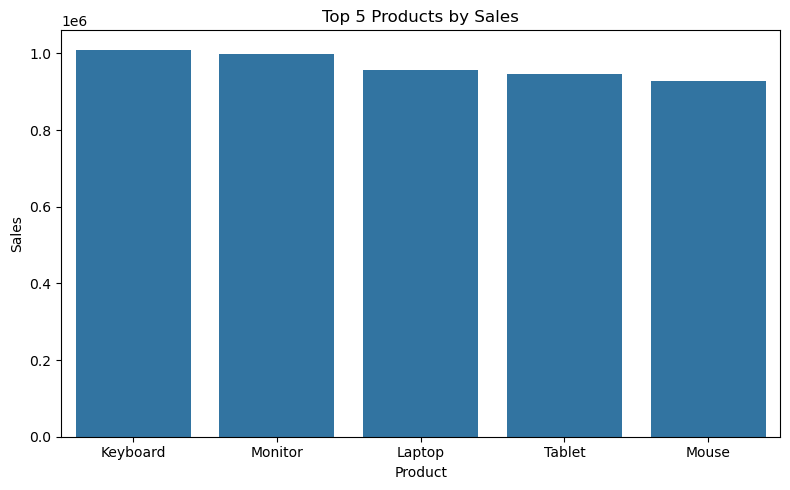

In [4]:
top_products = df.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 5 Products by Sales')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


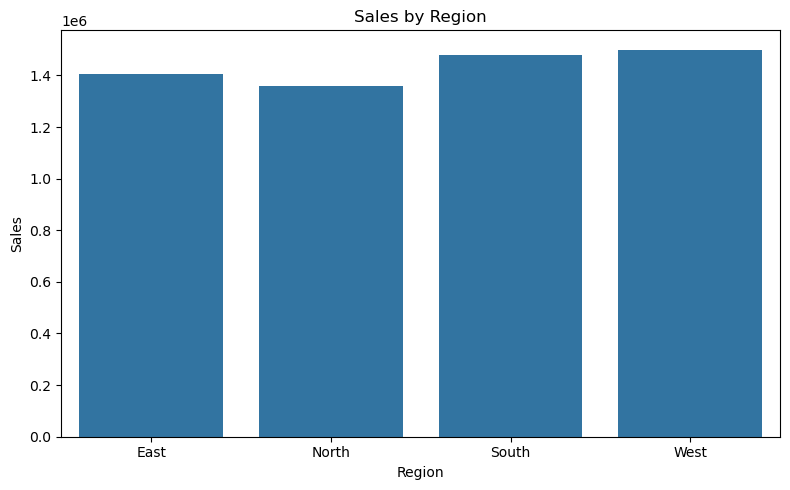

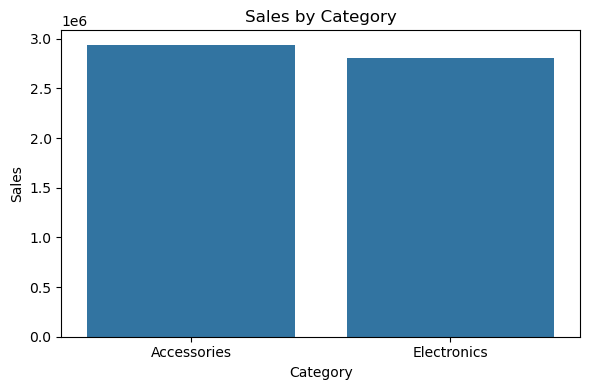

In [5]:
# Sales by Region
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Sales', data=sales_by_region)
plt.title('Sales by Region')
plt.tight_layout()
plt.show()

# Sales by Category
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='Category', y='Sales', data=sales_by_category)
plt.title('Sales by Category')
plt.tight_layout()
plt.show()
